Image Correct Class: 71-75%


1/1 [==============================] - 9s 9s/step
Prediction: [[7.8067766e-04 1.0822462e-03 9.8839495e-03 6.3672586e-04 2.0600695e-04
  1.4247819e-04 4.7144556e-04 7.8151427e-04 1.7401598e-03 1.9031807e-04
  4.3403692e-04 4.9297123e-05 4.8170756e-03 3.9524943e-01 2.2623953e-01
  3.2725212e-01 1.2435987e-02 1.7410614e-02 1.3837896e-04 5.7929428e-05]]
The predicted class by ResNet50 is 66-70%


1/1 [==============================] - 2s 2s/step
Prediction: [[7.50531326e-04 9.45576001e-03 1.86178461e-03 3.22490581e-03
  3.27983545e-03 2.07827333e-02 6.91272877e-03 1.40244537e-03
  2.85220507e-04 3.59492470e-03 4.69094217e-02 3.36252712e-03
  2.78872461e-03 1.19584076e-01 7.18298912e-01 3.08321510e-02
  1.09662749e-02 2.00628510e-05 1.51926540e-02 4.94285603e-04]]
The predicted class by VGG19 is 71-75%


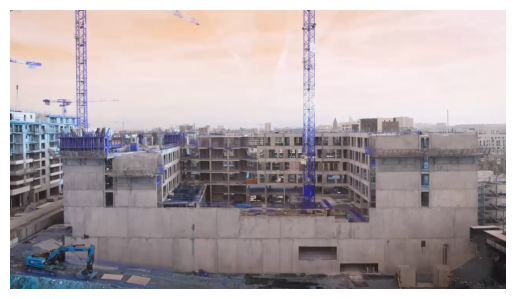

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import cv2
from tensorflow.keras.models import load_model
import re


#class_names = ['0-25%','26-50%','51-75%','76-100%']
class_names = ['0-%5','6-10%','11-15%','16-20%','21-25%','26-30%','31-35%','36-40%','41-45%','46-50%','51-55%','56-60%','61-65%','66-70%','71-75%','76-80%','81-85%','86-90%','91-95%','96-100%']

#Caricamento dei modelli salvati
model0 = load_model('C:/Users/Utente PC/Desktop/ProgettoIA/ai_course_template/src/notebooks/resnet(class5)')
model1 = load_model('C:/Users/Utente PC/Desktop/ProgettoIA/ai_course_template/src/notebooks/VGG19(class5)')

#Caricamento dell'immagine da testare
image_path0 = 'C:/Users/Utente PC/Desktop/ProgettoIA/ai_course_template/tests/Immagini/71-75%/1.7.png'
image0=cv2.imread(image_path0)

#Estrazione classe d'appartenenza delle immagini
a  = re.search("[0-9]*-[0-9]*%",image_path0)

#Stampa immagine e classe corrispondente
print("Image Correct Class:", a.group())
print("\n")
plt.axis("off")
plt.imshow(image0)

image_resized= cv2.resize(image0, (180,180)) #resize immagine
image0=np.expand_dims(image_resized,axis=0) #espande dimensioni immagine con una nuova dimensione, in modo che sia nel formato richiesto dal modello (TensorFlow)
PIL.Image.open(image_path0) #apre l'immagine e restituisce un oggetto utilizzabile per salvataggi, trasformazioni, visualizzazioni

#Predizione modello ResNet50
pred=model0.predict(image0)
print("Prediction:", pred)
output_class = class_names[np.argmax(pred)] #argmax prende l'indice dell'elemento massimo nell'array
print("The predicted class by ResNet50 is", output_class)

print("\n")

#Predizione modello VGG19
pred=model1.predict(image0)
print("Prediction:", pred)
output_class = class_names[np.argmax(pred)] #argmax prende l'indice dell'elemento massimo nell'array
print("The predicted class by VGG19 is", output_class)
